<a id='0'></a>
# <p style="background-color:orange; font-family:newtimeroman; font-size:220%; text-align:center; border-radius: 15px 50px;">Credit Card fraud Detection🖋📝</p>

<a id='1'></a>
# <p style="background-color:green; font-family:newtimeroman; font-size:130%; text-align:center; border-radius: 10px 25px;">Table of Content</p>
* [Import Libraries](#1)
* [Load Data](#2)
* [Exploratory Data Analysis](#2)
* [Data Pre-processing](#3)
* [Down-Sampling and Scaling](#4)
* [Machine Learning model training](#5)

# **Import Libraries**

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from category_encoders import WOEEncoder

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import train_test_split

sns.set_style('whitegrid') # sets the visual style of Seaborn plots to 'whitegrid', which displays a white background with grid lines.
sns.set_palette('pastel')  # sets the color palette to 'pastel', which is one of the predefined color palettes provided by Seaborn. It consists of a set of visually distinct colors suitable for plotting categorical data.

import warnings
# Ignore all warnings
warnings.simplefilter("ignore")

# **Load Data**

In [43]:
train_df = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv', index_col='Unnamed: 0')
test_df = pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv', index_col='Unnamed: 0')

<a id='2'></a>
# <p style="background-color:orange; font-family:newtimeroman; font-size:180%; text-align:center; border-radius: 15px 50px;">Exploratory Data Analysis</p>

In [44]:
train_df.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [45]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop               

In [46]:
train_df.shape

(1296675, 22)

In [47]:
is_fraud = train_df["is_fraud"].value_counts()
print("Yes: ",is_fraud[1])
print("No: ",is_fraud[0])

Yes:  7506
No:  1289169


**the data is un-balanced**

In [48]:
print(train_df.isna().sum().sum())
print(train_df.duplicated().sum())

0
0


In [49]:
train_df.groupby('state')['is_fraud'].value_counts()

state  is_fraud
AK     0            2084
       1              36
AL     0           40774
       1             215
AR     0           30966
                   ...  
WI     1             163
WV     0           25545
       1             146
WY     0           19212
       1             110
Name: count, Length: 101, dtype: int64

In [50]:
train_df.groupby('last')['is_fraud'].value_counts()

last       is_fraud
Abbott     0            510
           1              7
Adams      0           1550
           1             15
Adkins     0            506
                       ... 
Yu         0           3071
Zimmerman  0           3574
           1             11
Zuniga     0            488
           1             14
Name: count, Length: 888, dtype: int64

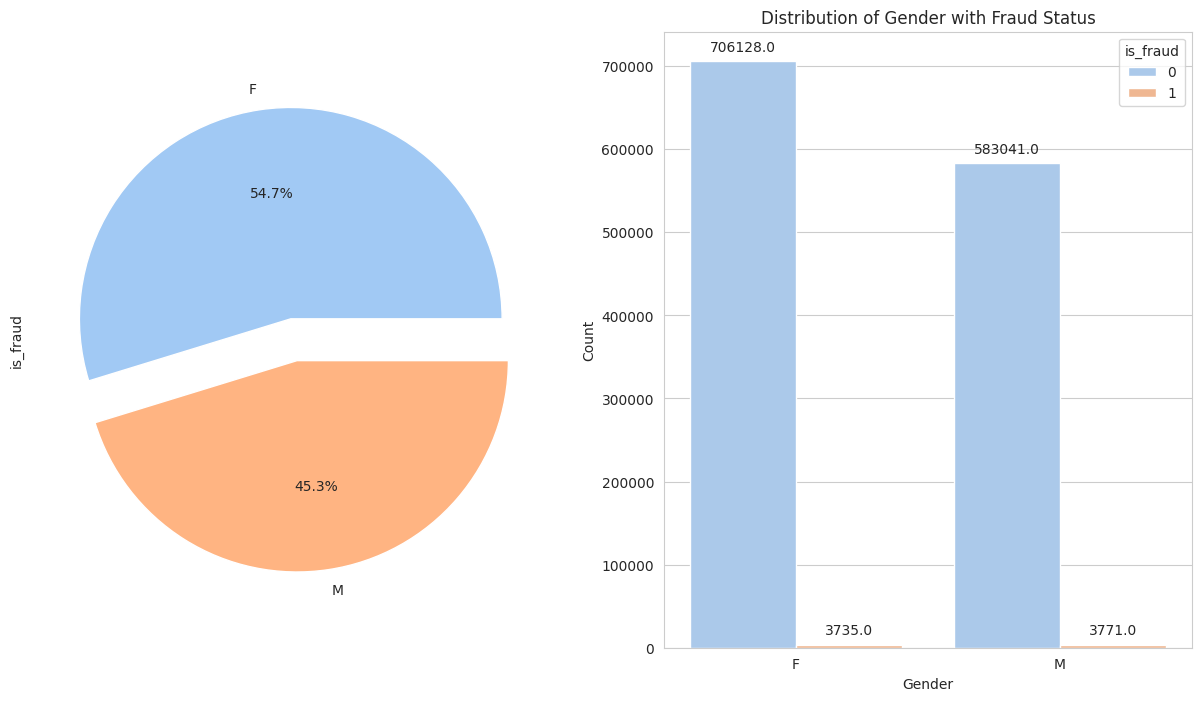

In [51]:
fig,axb = plt.subplots(ncols=2,nrows=1,figsize=(15, 8))

#Gender Distribution
explode = [0.1, 0.1]
train_df.groupby('gender')['is_fraud'].count().plot.pie(explode=explode, autopct="%1.1f%%",ax=axb[0]);

ax = sns.countplot(x="gender", hue="is_fraud", data=train_df,ax=axb[1])

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.title("Distribution of Gender with Fraud Status")
plt.xlabel("Gender")
plt.ylabel("Count")

# Show the plot
plt.show()

**Females are doing more transactions but males are more likely to make fraud transaction**

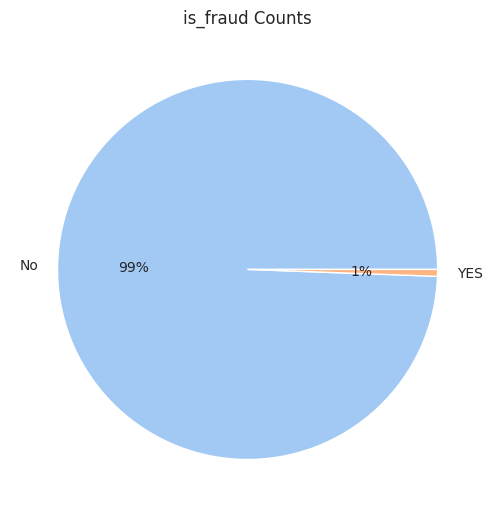

In [52]:
is_fraud = train_df["is_fraud"].value_counts()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(is_fraud, labels=["No", "YES"], autopct="%0.0f%%")
plt.title("is_fraud Counts")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

**99% is not fraud and only 1% is fraud leads to imbalanced data**

**Feature Engineering**

In [53]:
#Change date type from obj to datetime
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'],format='mixed')
test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'],format='mixed')

In [54]:
train_df['hour'] = train_df['trans_date_trans_time'].dt.hour
test_df['hour'] = test_df['trans_date_trans_time'].dt.hour

train_df['month'] = train_df['trans_date_trans_time'].dt.month
test_df['month'] = test_df['trans_date_trans_time'].dt.month

train_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,month
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,1
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,1


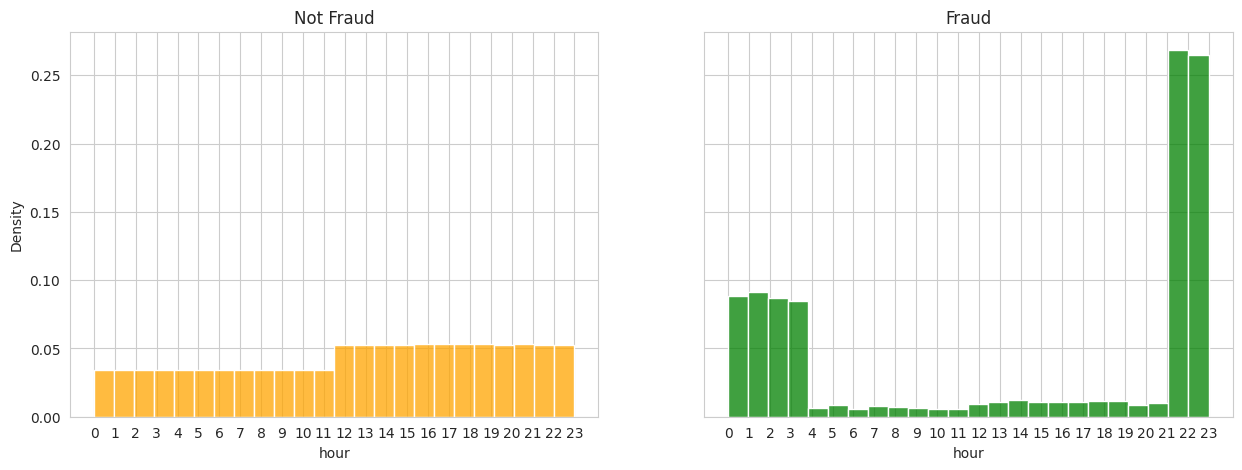

In [55]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)

ax1 = sns.histplot(x='hour', data=train_df[train_df["is_fraud"] == 0],
                   stat="density", bins=24, ax=ax1, color="orange")

ax2 = sns.histplot(x='hour', data=train_df[train_df["is_fraud"] == 1],
                   stat="density", bins=24, ax=ax2, color="green")

ax1.set_title("Not Fraud")
ax2.set_title("Fraud")

ax1.set_xticks(np.arange(24)) # ticks of the day 0 -> 23
ax2.set_xticks(np.arange(24));

**It is clear that fraud transactions mainly occur at midnight.**

**last 2 hours of the day**

<a id='3'></a>
# <p style="background-color:orange; font-family:newtimeroman; font-size:180%; text-align:center; border-radius: 15px 50px;">Data Pre-processing</p>

In [56]:
unique_transaction_count = len(train_df['trans_num'].unique())
print("Total count of unique transaction numbers:", unique_transaction_count)

Total count of unique transaction numbers: 1296675


**concluding that each transaction has it's own number**

In [57]:
# remove non-useful columns
columns_to_drop = ['first', 'unix_time', 'dob', 'cc_num', 'zip', 'city','street', 'state', 'trans_num', 'trans_date_trans_time']
train_df = train_df.drop(columns_to_drop, axis=1)
test_df = test_df.drop(columns_to_drop, axis=1)
train_df.head(2)

,merchant,category,amt,last,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,month
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,Banks,F,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,0,1
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Gill,F,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,0,1


In [58]:
#clean merchant column
train_df['merchant'] = train_df['merchant'].apply(lambda x : x.replace('fraud_',''))

In [59]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   merchant    1296675 non-null  object 
 1   category    1296675 non-null  object 
 2   amt         1296675 non-null  float64
 3   last        1296675 non-null  object 
 4   gender      1296675 non-null  object 
 5   lat         1296675 non-null  float64
 6   long        1296675 non-null  float64
 7   city_pop    1296675 non-null  int64  
 8   job         1296675 non-null  object 
 9   merch_lat   1296675 non-null  float64
 10  merch_long  1296675 non-null  float64
 11  is_fraud    1296675 non-null  int64  
 12  hour        1296675 non-null  int32  
 13  month       1296675 non-null  int32  
dtypes: float64(5), int32(2), int64(2), object(5)
memory usage: 138.5+ MB


In [60]:
train_df.head(2)

,merchant,category,amt,last,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,month
0,"Rippin, Kub and Mann",misc_net,4.97,Banks,F,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,0,1
1,"Heller, Gutmann and Zieme",grocery_pos,107.23,Gill,F,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,0,1


In [61]:
train_df.describe(include='object')

,merchant,category,last,gender,job
count,1296675,1296675,1296675,1296675,1296675
unique,693,14,481,2,494
top,Kilback LLC,gas_transport,Smith,F,Film/video editor
freq,4403,131659,28794,709863,9779


#### **Data Encoding**

**WOEEncoder**

is a type of categorical encoding technique used in machine learning, particularly in the context of handling categorical variables in predictive modeling tasks, such as classification. WOE stands for **"Weight of Evidence."** It's a popular encoding technique in credit scoring and fraud detection.

In summary, while label encoding simply assigns numerical labels to categories, WOE encoding calculates numerical values based on the relationship between each category and the target variable, providing more meaningful representations for categorical variables in certain modeling contexts, especially those where the predictive power of categorical variables is crucial.

In [62]:
# applying label encoding
train_df['gender'] = train_df['gender'].map({'F': 0, 'M': 1})

# applying WOE encoding
for col in ['job','merchant', 'category', 'lat', 'last']:
    train_df[col] = WOEEncoder().fit_transform(train_df[col],train_df['is_fraud'])

In [63]:
train_df.head(3)

,merchant,category,amt,last,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,month
0,0.959326,0.924914,4.97,-2.469513,0,36.0788,-81.1781,3495,-1.080186,36.011293,-82.048315,0,0,1
1,0.663187,0.898799,107.23,-0.673638,0,48.8878,-118.2105,149,-0.904144,49.159047,-118.186462,0,0,1
2,-0.790166,-0.847622,220.11,0.433257,1,42.1808,-112.2620,4154,1.120434,43.150704,-112.154481,0,0,1


<a id='4'></a>
# <p style="background-color:orange; font-family:newtimeroman; font-size:180%; text-align:center; border-radius: 15px 50px;">Down-Sampling and Scaling</p>

**as our data is imbalanced we will use Resampling Techniques**

**down_sampling technique :**

Downsampling involves reducing the number of instances in the majority class to balance it with the number of instances in the minority class.

This helps prevent the machine learning model from being biased towards the majority class and improves its ability to learn patterns from the minority class.

In [66]:
from sklearn.utils import resample

No_class = train_df[train_df["is_fraud"]==0]
yes_class = train_df[train_df["is_fraud"]==1]

No_class = resample(No_class, replace=False, n_samples=len(yes_class))
down_samples = pd.concat([yes_class, No_class], axis=0)


X = down_samples.drop("is_fraud", axis=1)
y = down_samples["is_fraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

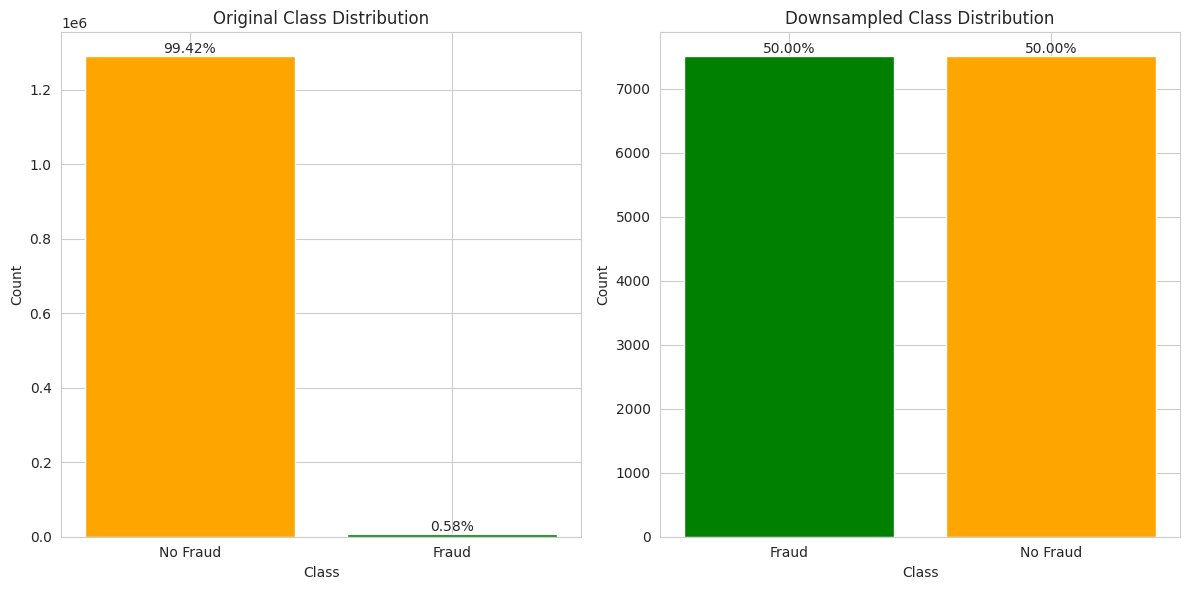

In [77]:
# Count the occurrences of each class in the original dataset
original_class_counts = train_df["is_fraud"].value_counts()

# Count the occurrences of each class in the downsampled dataset
downsampled_class_counts = down_samples["is_fraud"].value_counts()

# Calculate the percentage of each class
original_percentages = original_class_counts / len(train_df) * 100
downsampled_percentages = downsampled_class_counts / len(down_samples) * 100

# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for original class distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_class_counts.index, original_class_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(original_class_counts.index, ['No Fraud', 'Fraud'])

# Bar chart for downsampled class distribution
plt.subplot(1, 2, 2)
bars_2 = plt.bar(downsampled_class_counts.index, downsampled_class_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_2, downsampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Downsampled Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(downsampled_class_counts.index, ['No Fraud', 'Fraud'])

plt.tight_layout() # the plots will be automatically adjusted to ensure that there is no overlap between subplots and that all elements are clearly visible.
plt.show()

<a id='5'></a>
# <p style="background-color:orange; font-family:newtimeroman; font-size:180%; text-align:center; border-radius: 15px 50px;">Machine Learning model training</p>

# **[1] Logistic Regression -> LR**

In [67]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
predict_LR = LR_model.predict(X_test)
print(classification_report(y_test, predict_LR))
LR_accuracy = accuracy_score(predict_LR,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy*100))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1486
           1       0.92      0.77      0.84      1517

    accuracy                           0.85      3003
   macro avg       0.86      0.85      0.85      3003
weighted avg       0.86      0.85      0.85      3003

Logistic Regression accuracy is: 84.95%


# **[2] Support Vector Machine Model (SVC)**

In [79]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
predict = svm_model.predict(X_test)

print(classification_report(y_test, predict))
svm_accuracy = accuracy_score(predict,y_test)
print('SVC model accuracy is: {:.2f}%'.format(svm_accuracy*100))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1486
           1       0.93      0.75      0.83      1517

    accuracy                           0.85      3003
   macro avg       0.86      0.85      0.85      3003
weighted avg       0.86      0.85      0.85      3003

SVC model accuracy is: 84.72%


# **[3]GaussianNB**

In [88]:
from sklearn.naive_bayes import GaussianNB

# Create and train the Gaussian Naive Bayes model
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_naive = NB_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_naive))
GaussianNB_accuracy = accuracy_score(y_pred_naive, y_test)
print('Naive Bayes model accuracy is: {:.2f}%'.format(GaussianNB_accuracy * 100))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84      1486
           1       0.91      0.73      0.81      1517

    accuracy                           0.83      3003
   macro avg       0.84      0.83      0.83      3003
weighted avg       0.84      0.83      0.83      3003

Naive Bayes model accuracy is: 83.02%


# **[4] Decision Tree Model (ID3)**

In [83]:
DT = DecisionTreeClassifier(max_depth=(1), random_state=0)
DT.fit(X_train, y_train)
predict_ID3 = DT.predict(X_test)
print(classification_report(y_test, predict_ID3))
ID3_accuracy = accuracy_score(predict_ID3,y_test)
print('ID3 model accuracy is: {:.2f}%'.format(ID3_accuracy*100))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87      1486
           1       0.97      0.74      0.84      1517

    accuracy                           0.85      3003
   macro avg       0.87      0.86      0.85      3003
weighted avg       0.88      0.85      0.85      3003

ID3 model accuracy is: 85.38%


# **[5] RandomForestClassifier**

In [84]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest classifier
RF = RandomForestClassifier(n_estimators=100, random_state=0)
RF.fit(X_train, y_train)

# Make predictions on the test set
predict_RF = RF.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predict_RF))
RF_accuracy = accuracy_score(predict_RF, y_test)
print('Random Forest model accuracy is: {:.2f}%'.format(RF_accuracy * 100))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1486
           1       0.97      0.97      0.97      1517

    accuracy                           0.97      3003
   macro avg       0.97      0.97      0.97      3003
weighted avg       0.97      0.97      0.97      3003

Random Forest model accuracy is: 96.74%


# **[6] XGBClassifier**

In [85]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost classifier
XGB = XGBClassifier(random_state=0)  # You can adjust hyperparameters as needed
XGB.fit(X_train, y_train)

# Make predictions on the test set
predict_XGB = XGB.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predict_XGB))
XGB_accuracy = accuracy_score(predict_XGB, y_test)
print('XGBoost model accuracy is: {:.2f}%'.format(XGB_accuracy * 100))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1486
           1       0.97      0.98      0.98      1517

    accuracy                           0.98      3003
   macro avg       0.98      0.98      0.98      3003
weighted avg       0.98      0.98      0.98      3003

XGBoost model accuracy is: 97.64%


In [91]:
Algorithms = ['XGBClassifier', 'RandomForest', 'ID3', 'Logistic Regression', 'SVC', 'GaussianNB']
accuracy = [XGB_accuracy, RF_accuracy, ID3_accuracy, LR_accuracy, svm_accuracy, GaussianNB_accuracy]

FinalResult=pd.DataFrame({'Algorithm':Algorithms, 'Accuracy':accuracy})

FinalResult

,Algorithm,Accuracy
0,XGBClassifier,0.976357
1,RandomForest,0.967366
2,ID3,0.853813
3,Logistic Regression,0.849484
4,SVC,0.847153
5,GaussianNB,0.830170


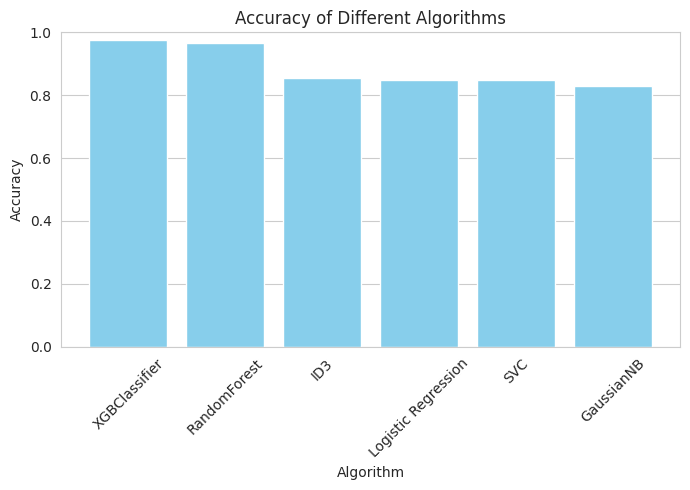

In [104]:
# Plotting
plt.figure(figsize=(7, 5))
plt.bar(FinalResult['Algorithm'], FinalResult['Accuracy'], color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')
plt.ylim(0, 1)  # Set the limit of y-axis from 0 to 1 (accuracy ranges from 0 to 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='x')  # Add gridlines only along the x-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()